In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [18]:

# Seed for reproducibility
np.random.seed(0)

# Generate sample data for 200 baseball players
num_players = 250
games_played = np.random.randint(50, 160, size=num_players)  # Number of games played
home_runs = np.random.randint(0, 50, size=num_players)  # Number of home runs
batting_average = np.random.uniform(0.2, 0.4, size=num_players)  # Batting average
all_star = np.random.choice([0, 1], size=num_players)  # All-Star status (0 for No, 1 for Yes)

# Create a DataFrame
data = {
    'Games_Played': games_played,
    'Home_Runs': home_runs,
    'Batting_Average': batting_average,
    'All_Star': all_star
}
baseball_df = pd.DataFrame(data)

In [19]:
# Splitting the dataset for regression
X = baseball_df.drop('Batting_Average', axis=1)
y = baseball_df['Batting_Average']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [20]:

# Training the decision tree regressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=0)

In [21]:


# Predicting test set results
y_pred = regressor.predict(X_test)

# Evaluating the regressor
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared: {r2_score(y_test, y_pred)}')


Mean Squared Error: 0.006009712989082543
R-squared: -0.8086713149856088


In [22]:

# Tuning the model with GridSearchCV
param_grid = {'max_depth': np.arange(3, 10)}
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid)
grid.fit(X_train, y_train)

# Best parameters and best score
print(f'Best parameters: {grid.best_params_}')
print(f'Best score: {grid.best_score_}')

Best parameters: {'max_depth': 3}
Best score: -0.194658200450382


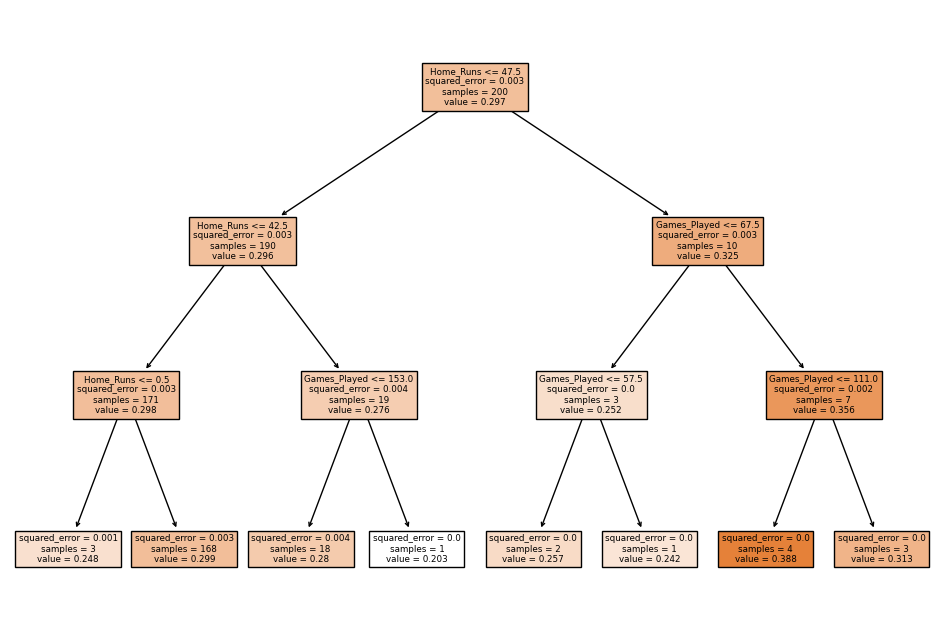

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
!pip install graphviz
import graphviz
# Visualizing the decision tree
plt.figure(figsize=(12,8))
plot_tree(grid.best_estimator_, filled=True, feature_names=X.columns)
plt.show()